In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# **Regresion lineal simple**

In [ ]:
import os
import numpy as np
from matplotlib import pyplot

En este código, se utiliza np.genfromtxt() para cargar los datos como cadenas de texto, y luego se convierten las columnas relevantes a números de punto flotante utilizando astype(float).

In [ ]:
data = np.genfromtxt('/content/gdrive/MyDrive/Laboratorio1/Apple1.txt', delimiter=',', skip_header=1)
X, y = data[:, 2], data[:, 6]  # Seleccionar la tercera columna para X (High) y la séptima columna para y (Volume)
m = y.size  # Calcular el tamaño de y

Este Obtine una Grafica de X que es el precio Mas alto y De Y el Volumen de mercado

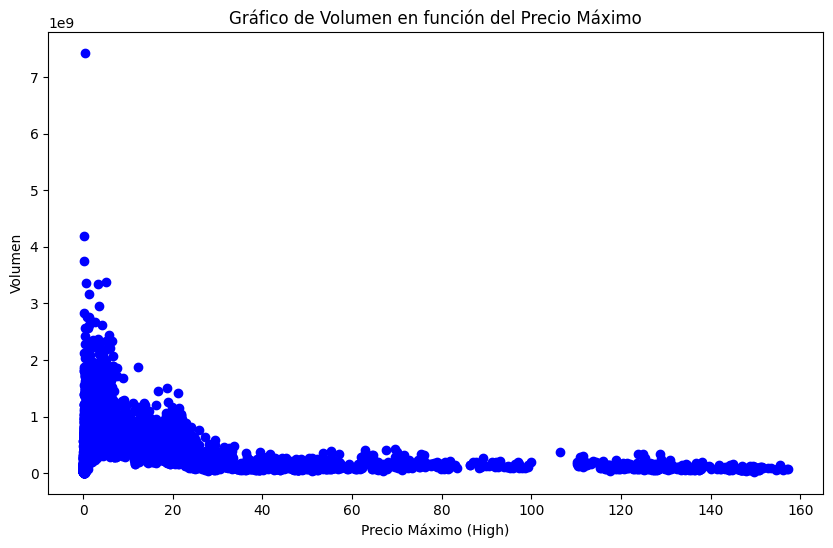

In [ ]:
import matplotlib.pyplot as plt

def graficarDatos(x, y):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel('Precio Maximo')
  pyplot.ylabel('Volumen')

# Suponiendo que X contiene los datos de High y y contiene los datos de Volumen
graficarDatosHigh(data[:, 2], y)  # Se asume que la tercera columna de 'data' contiene los datos de High

In [ ]:
# No olvidarse agregar unos a la matriz de x
X = np.stack([np.ones(m), X], axis=1)

Calcula la función de costo para un modelo de regresión lineal

In [ ]:
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [ ]:
theta=np.array([0.1, 0.0])
JJ = calcularCosto(X, y, theta)
print(f"con theta:{ theta } se obtiene un costo de: {JJ}")

con theta:[0.1 0. ] se obtiene un costo de: 1.138051351009491e+17


In [ ]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

In [ ]:
theta = np.zeros(2)

num_ite = 100000
alpha = 0.001

theta, J_historico = calcularDescensoGradiente(X, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

los valores de theta calculados son: [ 3.63476544e+08 -2.30026272e+06]
con un costo de: 5.5994434421411144e+16 


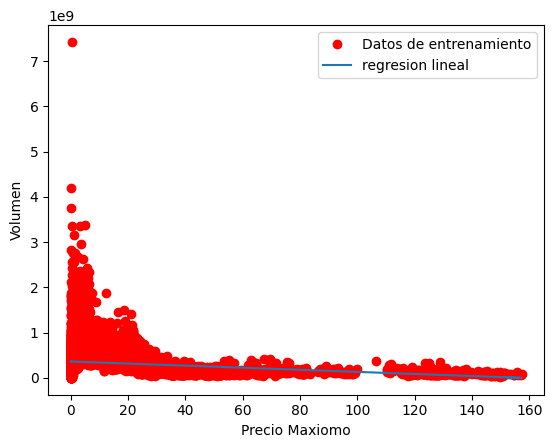

In [ ]:
graficarDatos(X[:, 1], y)
pyplot.plot(X[:,1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [ ]:
y_pred = np.dot([1, 1.3], theta)
print(y_pred)

360486202.94336665


# **Regresion lineal Multivariable**

In [ ]:
import os
import numpy as np
from matplotlib import pyplot

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Leer datos
data = np.genfromtxt('/content/gdrive/MyDrive/Laboratorio1/Apple1.txt', delimiter=',', skip_header=1)
X = data[:, 1:6]  # Seleccionar las columnas 1 a 5 como características de entrada
y = data[:, 6]    # Seleccionar la columna 6 (Volume) como variable de salida
m = y.size

In [ ]:
X.shape

(10307, 5)

In [ ]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[1.28348000e-01 1.28906000e-01 1.28348000e-01 1.28348000e-01
  1.00600000e-01]
 [1.22210000e-01 1.22210000e-01 1.21652000e-01 1.21652000e-01
  9.53520000e-02]
 [1.13281000e-01 1.13281000e-01 1.12723000e-01 1.12723000e-01
  8.83530000e-02]
 ...
 [1.48679993e+02 1.49369995e+02 1.47619995e+02 1.48639999e+02
  1.48639999e+02]
 [1.49330002e+02 1.50839996e+02 1.49009995e+02 1.49320007e+02
  1.49320007e+02]
 [1.49360001e+02 1.49690002e+02 1.48490005e+02 1.49320007e+02
  1.49320007e+02]]
Media calculada: [12.46124301 12.5926253  12.32748152 12.46493286 11.87633133]
Desviación estandar calculada: [26.24944394 26.53056944 25.96143648 26.25782185 25.97524833]
[[-0.46983452 -0.4697871  -0.4698944  -0.46982514 -0.45334432]
 [-0.47006836 -0.47003949 -0.47015232 -0.47008015 -0.45354636]
 [-0.47040852 -0.47037604 -0.47049625 -0.4704202  -0.45381581]
 ...
 [ 5.18939564  5.15546302  5.21128766  5.18607624  5.26515342]
 [ 5.21415841  5.21087084  5.26482861  5.21197359  5.2913325 ]
 [ 5.21530126  5.16752

In [ ]:
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro')
  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

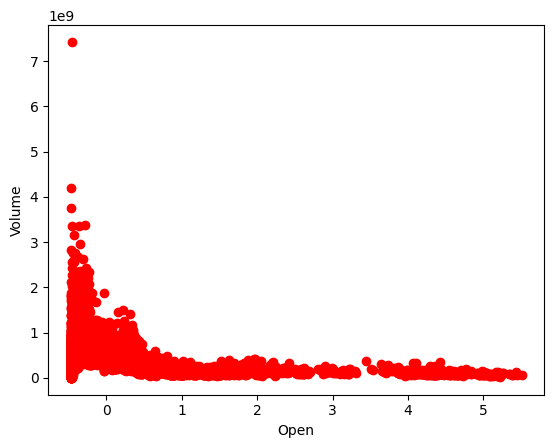

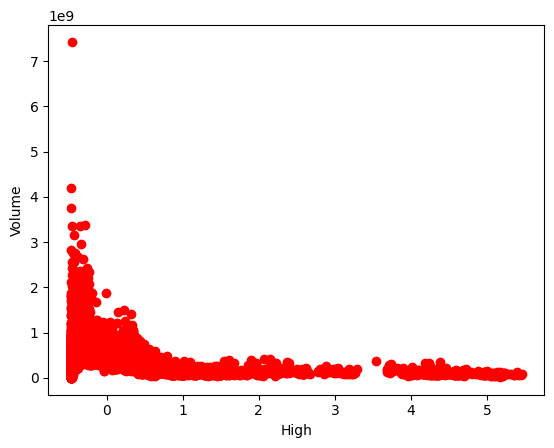

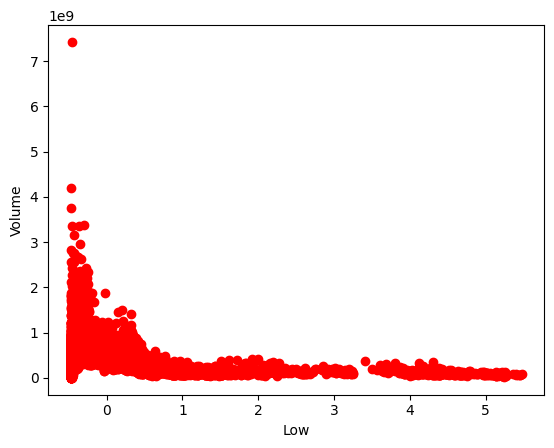

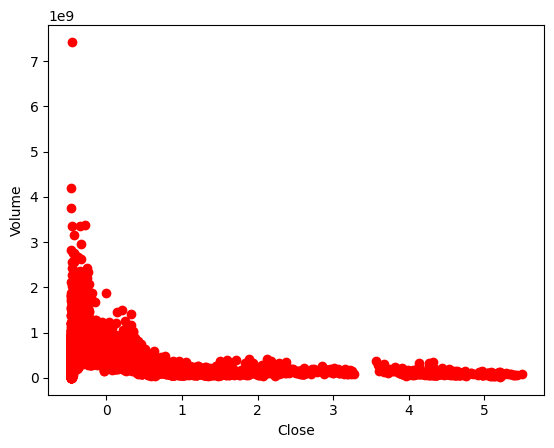

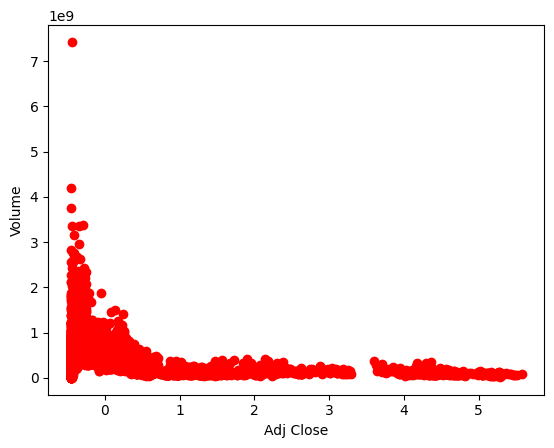

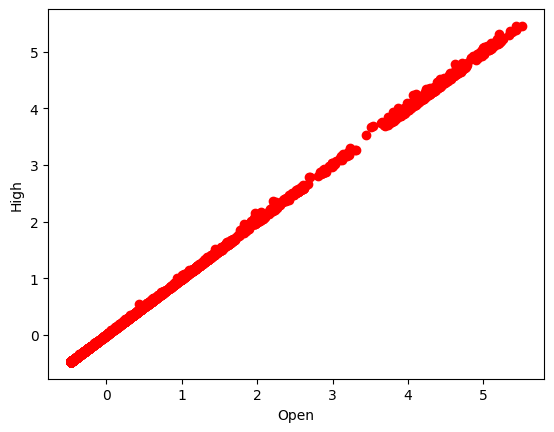

In [ ]:
xlabel1 = "Open"
xlabel2 = "High"
xlabel3 = "Low"
xlabel4 = "Close"
xlabel5 = "Adj Close"
ylabel1 = "Volume"
graficarDatos(X_norm[:, 0], y, xlabel1, ylabel1)
graficarDatos(X_norm[:, 1], y, xlabel2, ylabel1)
graficarDatos(X_norm[:, 2], y, xlabel3, ylabel1)
graficarDatos(X_norm[:, 3], y, xlabel4, ylabel1)
graficarDatos(X_norm[:, 4], y, xlabel5, ylabel1)
graficarDatos(X_norm[:, 0], X_norm[:, 1], xlabel1, xlabel2)

In [ ]:
# No olvidarse agregar unos a la matriz de x
#munos = np.ones([m, 1]).unsqueese
#print(munos.shape)
#X = np.stack([np.ones(m), X], axis=1)
#X = np.stack([X, munos], axis=1)
# X = np.insert(X, 0, 1, axis=1)
# X.shape
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)





In [ ]:
def calcularCosto(X, y, theta):
    m = y.size
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [ ]:
theta = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6]).reshape(-1, 1)
JJ = calcularCosto(X_ready, y, theta)
print(f"con theta:{ theta.flatten() } se obtiene un costo de: {JJ}")

con theta:[0.1 0.2 0.3 0.4 0.5 0.6] se obtiene un costo de: 1.1729895274854841e+21


In [ ]:
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

los valores de theta calculados son: [ 3.34495019e+08 -9.00025881e+06 -6.84540830e+06 -1.27271066e+07
 -9.86877078e+06 -2.31457710e+07]
con un costo de: 5.594421882706186e+16 


Text(0, 0.5, 'Costo J')

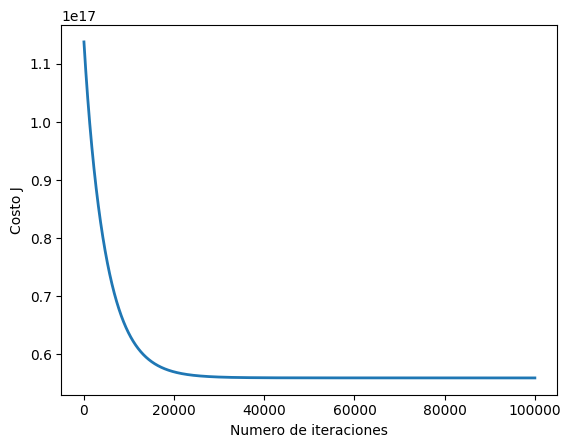

In [ ]:
theta = np.zeros(6)

num_ite = 100000
alpha = 0.0001

theta, J_historico = calcularDescensoGradiente(X_ready, y, theta, alpha, num_ite)
print(f"los valores de theta calculados son: { theta }")
print(f"con un costo de: { J_historico[-1]} ")

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

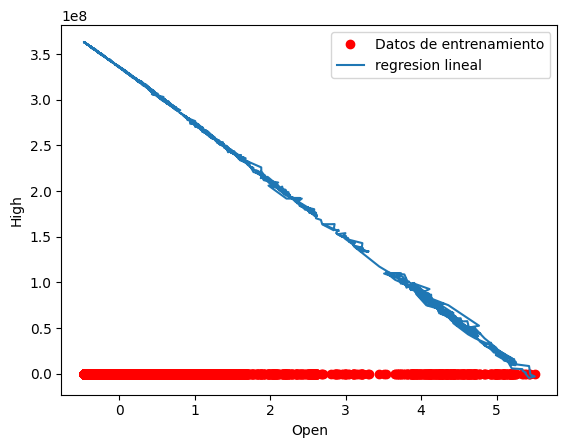

In [ ]:
#graficarDatos(X[:, 1], y, xlabel1, ylabel1)
# graficarDatos(X[:, 2], y, xlabel2, ylabel1)
graficarDatos(X_ready[:, 1], X_ready[:, 2], xlabel1, xlabel2)

pyplot.plot(X_ready[:, 1], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

In [ ]:
# 0.128348,0.128906,0.128348,0.128348,0.100600,469033600
# 2300,4,449900
y_pred = np.dot([1, 6.614643,6.745357,6.530357,6.720000,5.769901], theta)
print(y_pred)

-54192699.669157416


# **Utilizar Ecuacion de la norma**

In [ ]:
def calcularThethaEcuacionNormal(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [ ]:
X_ren = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
theta = calcularThethaEcuacionNormal(X_ren, y);
print(f"los valores de theta calculados son: { theta }")


los valores de theta calculados son: [ 3.35745490e+08 -1.64406747e+06  1.25708545e+08 -1.28352735e+08
  6.20108439e+07 -6.35249887e+07]


# **Predicciones**

In [ ]:
import numpy as np
X_array = np.array([1, 0.128230, 0.128280, 0.128220, 0.128260, 0.100260])
volumen = np.dot(X_array, theta)
print(f"Volumen predicho: {volumen:.2f}")

In [ ]:
import numpy as np
X_array = np.array([1, 0.128350, 0.128990, 0.128350, 0.128350, 0.100620])
volumen = np.dot(X_array, theta)
print(f"Volumen predicho: {volumen:.2f}")

Volumen predicho: 327227738.05


In [ ]:
import numpy as np
X_array = np.array([1, 123.128350, 123.128990, 123.128350, 123.128350, 120.100620])
volumen = np.dot(X_array, theta)
print(f"Volumen predicho: {volumen:.2f}")

Volumen predicho: -7178574758.30


In [ ]:
import numpy as np
X_array = np.array([1, 1.128350, 1.128990, 1.128350, 1.128350, 0.100620])
volumen = np.dot(X_array, theta)
print(f"Volumen predicho: {volumen:.2f}")

Volumen predicho: 288786193.53


# **Regresion Polinomica**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:

# Leer datos
data = np.genfromtxt('/content/gdrive/MyDrive/Laboratorio1/Apple1.txt', delimiter=',', skip_header=1)
X = data[:, 1:6]  # Seleccionar las columnas 1 a 5 como características de entrada
y = data[:, 6]    # Seleccionar la columna 6 (Volume) como variable de salida



In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Crear características polinómicas
poly_features = PolynomialFeatures(degree=2)  # Puedes ajustar el grado del polinomio según sea necesario
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


In [ ]:

# Entrenar el modelo de regresión lineal con las características polinómicas
model = LinearRegression()
model.fit(X_train_poly, y_train)


In [ ]:

# Predecir sobre los datos de prueba
y_pred = model.predict(X_test_poly)
print(y_pred)

[3.06564137e+08 2.85979387e+08 2.81837675e+08 ... 3.19084218e+08
 2.71894456e+08 3.74199739e+08]


In [ ]:

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)


Error cuadrático medio: 7.573956027267829e+16


# **PREDICCIONES**

In [ ]:
# Supongamos que quieres predecir el valor de y para un nuevo conjunto de datos
nuevos_datos = np.array([[6.614643, 6.745357, 6.530357, 6.720000, 5.769901]])  # Ajusta los valores según tu necesidad

# Aplica las mismas transformaciones polinómicas que aplicaste a los datos de entrenamiento
nuevos_datos_poly = poly_features.transform(nuevos_datos)

# Realiza la predicción usando el modelo entrenado
prediccion_y = model.predict(nuevos_datos_poly)

print("Predicción de volumen:", prediccion_y)


Predicción de volumen: [7.24547207e+08]


In [ ]:
# Supongamos que quieres predecir el valor de y para un nuevo conjunto de datos
nuevos_datos = np.array([[0.614643, 1.745357, 0.530357, 0.720000, 0.769901]])  # Ajusta los valores según tu necesidad

# Aplica las mismas transformaciones polinómicas que aplicaste a los datos de entrenamiento
nuevos_datos_poly = poly_features.transform(nuevos_datos)

# Realiza la predicción usando el modelo entrenado
prediccion_y = model.predict(nuevos_datos_poly)

print("Predicción de volumen:", prediccion_y)

Predicción de volumen: [1.52585558e+09]


In [ ]:
# Supongamos que quieres predecir el valor de y para un nuevo conjunto de datos
nuevos_datos = np.array([[13.614643, 13.745357, 13.530357, 13.720000, 13.769901]])  # Ajusta los valores según tu necesidad

# Aplica las mismas transformaciones polinómicas que aplicaste a los datos de entrenamiento
nuevos_datos_poly = poly_features.transform(nuevos_datos)

# Realiza la predicción usando el modelo entrenado
prediccion_y = model.predict(nuevos_datos_poly)

print("Predicción de volumen:", prediccion_y)

Predicción de volumen: [-52231394.51700902]
